# Bellabeat Case Study (Google Data Analytics Capstone)

**Author:** Catrina Moore  
**Date:** February 2026 

# Table of Contents

- [Summary](#summary)

- [1. Ask](#1-ask)
  - [1.1 Business Task](#11-business-task)
  - [1.2 Key Stakeholders](#12-key-stakeholders)

- [2. Prepare](#2-prepare)
  - [2.1 Dataset Used](#21-dataset-used)
  - [2.2 Credibility and Integrity of Data (ROCCC Assessment)](#22-credibility-and-integrity-of-data-roccc-assessment)

- [3. Process](#3-process)
  - [3.1 Installing packages and opening libraries](#31-installing-packages-and-opening-libraries)
  - [3.2 Importing Datasets](#32-importing-datasets)
  - [3.3 Preview Datasets](#33-preview-datasets)
  - [3.4 Clean and Format](#34-clean-and-format)
    - [3.4.1 Renaming Tables](#341-renaming-tables)
    - [3.4.2 Cleaning Column Names](#342-cleaning-column-names)
    - [3.4.3 Convert Dates](#343-convert-dates)
    - [3.4.4 Verify Users](#344-verify-users)
    - [3.4.5 Verify Duplicates](#345-verify-duplicates)
    - [3.4.6 Remove Duplicates/Confirm Removal](#346-remove-duplicatesconfirm-removal)
    - [3.4.7 Join Datasets](#347-join-datasets)

- [4. Analyze](#4-analyze)
  - [4.1 Summary Statistics](#41-summary-statistics)
  - [4.2 Average Daily Activity](#42-average-daily-activity)
  - [4.2 User Daily Averages](#42-user-daily-averages)
  - [4.3 Activity Level Classification](#43-activity-level-classification)
    - [4.3.1 Segment Distribution](#431-segment-distribution)
  - [4.4 Relationship Between Daily Steps and Sedentary Minutes](#44-relationship-between-daily-steps-and-sedentary-minutes)
  - [4.5 Activity Level Distribution](#45-activity-level-distribution)
  - [4.6 Minutes Asleep vs. Time in Bed](#46-minutes-asleep-vs-time-in-bed)
  - [4.7 Total Steps vs. Total Minutes Asleep](#47-total-steps-vs-total-minutes-asleep)

- [5. Share](#5-share)
  - [5.1 Key Findings](#51-key-findings)

- [6. Act](#6-act)
  - [6.1 Recommendations for the Bellabeat Leaf Tracker](#61-recommendations-for-the-bellabeat-leaf-tracker)

- [7. Conclusion](#7-conclusion)


##**Summary**
Bellabeat is a high-tech company that manufactures health-focused smart products. The products are designed to inform and inspire women around the world. The products collects data on activity, sleep, stress, and reproductive health to empower women with the knowledge about their own health and habits. 

# 1. Ask

## 1.1 Business Task
To analyze smart device usage data to gain insight into how consumers use non-Bellabeat smart devices. Select one Bellabeat product to apply these insights and provide marketing recommendations and strategies to unlock new growth opportunities for the company.

## 1.2 Key Stakeholders
- Urska Srsen — Cofounder and Chief Creative Officer  
- Sando Mur — Mathematician and Cofounder (Bellabeat executive team)  
- Bellabeat Marketing Analytics Team  


# 2. Prepare

## 2.1 Dataset Used
The dataset used is **FitBit Fitness Tracker Data**:  
https://www.kaggle.com/datasets/arashnic/fitbit  

(CC0: Public Domain, dataset made available through Mobius)

For this analysis, the following datasets were used:

- **dailyActivity_merged.csv**  
  Daily activity for 33 users over 31 days (steps, distance, intensity, calories)

- **sleepDay_merged.csv**  
  Daily sleep logs (sleep records, total minutes asleep, total time in bed)

- **hourlySteps_merged.csv**  
  Log of steps per hour for 33 users over 31 days

## 2.2 Credibility and Integrity of Data (ROCCC Assessment)
The dataset was collected from real Fitbit users, but it was provided through a third-party source.  
Limitations include:

- Small sample size (33 users)
- No gender labels (Bellabeat is women-focused)
- Only 1 month of data
- Data is from 2016 (not current)


# 3. Process

I used **R** to process, clean, and analyze the data. I chose R primarily because of its strong visualization capabilities.

In [1]:
install.packages("tidyverse")
install.packages("janitor")
install.packages("lubridate")

library(tidyverse)
library(readr)
library(janitor)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



also installing the dependency ‘timechange’




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.5     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## 3.2 Importing Datasets

In [2]:
data_path <- "/kaggle/input/mturkfitbit-fitabase-data"

dailyActivity_merged <- read_csv(file.path(data_path, "dailyActivity_merged.csv"))
sleepDay_merged <- read_csv(file.path(data_path, "sleepDay_merged.csv"))
hourlySteps_merged <- read_csv(file.path(data_path, "hourlySteps_merged.csv"))

Rows: 940 Columns: 15


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 413 Columns: 5


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 22099 Columns: 3


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dailyActivity_merged <- read_csv("dailyActivity_merged.csv")
sleepDay_merged <- read_csv("sleepDay_merged.csv")
hourlySteps_merged <- read_csv("hourlySteps_merged.csv")

## 3.3 Preview Datasets

In [3]:
head(dailyActivity_merged)
head(sleepDay_merged)
head(hourlySteps_merged)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


## 3.4 Clean and Format

### 3.4.1 Renaming Tables

In [4]:
daily_activity <- dailyActivity_merged
sleep_day <- sleepDay_merged
hourly_steps <- hourlySteps_merged

### 3.4.2 Cleaning Column Names

In [5]:
daily_activity <- daily_activity %>% clean_names()
hourly_steps <- hourly_steps %>% clean_names()
sleep_day <- sleep_day %>% clean_names()

### 3.4.3 Convert Dates

In [6]:
daily_activity <- daily_activity %>%
  mutate(activity_date = as.Date(activity_date, format = "%m/%d/%Y"))

### 3.4.4 Verify Users

In [7]:
n_distinct(daily_activity$id)
n_distinct(hourly_steps$id)
n_distinct(sleep_day$id)

[1] 33

[1] 33

[1] 24

### 3.4.5 Verify Duplicates

In [8]:
sum(duplicated(daily_activity))
sum(duplicated(hourly_steps))
sum(duplicated(sleep_day))

[1] 0

[1] 0

[1] 3

### 3.4.6 Remove Duplicates/Confirm Removal

In [9]:
sleep_day <- sleep_day %>% distinct()
sum(duplicated(sleep_day))

[1] 0

### 3.4.7 Join Datasets

Joined the daily activity dataset with the sleep dataset using the `id` column and matching the activity date with the sleep date. The merged dataset is named **activity_sleep**.

In [10]:
sleep_day <- sleep_day %>%
  mutate(
    sleep_day = mdy_hms(sleep_day)
  ) %>%
  mutate(
    sleep_day = as.Date(sleep_day)
  )

In [11]:
daily_activity <- daily_activity %>%
  mutate(activity_date = as.Date(activity_date))

In [12]:
activity_sleep <- daily_activity %>%
  left_join(sleep_day, by = c("id" = "id", "activity_date" = "sleep_day"))

# 4. Analyze

## 4.1 Summary Statistics

In [13]:
activity_sleep %>%
  select(
    total_steps,
    total_distance,
    sedentary_minutes,
    total_minutes_asleep,
    total_time_in_bed
  ) %>%
  summary()

  total_steps    total_distance   sedentary_minutes total_minutes_asleep
 Min.   :    0   Min.   : 0.000   Min.   :   0.0    Min.   : 58.0       
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8    1st Qu.:361.0       
 Median : 7406   Median : 5.245   Median :1057.5    Median :432.5       
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2    Mean   :419.2       
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5    3rd Qu.:490.0       
 Max.   :36019   Max.   :28.030   Max.   :1440.0    Max.   :796.0       
                                                    NA's   :530         
 total_time_in_bed
 Min.   : 61.0    
 1st Qu.:403.8    
 Median :463.0    
 Mean   :458.5    
 3rd Qu.:526.0    
 Max.   :961.0    
 NA's   :530      

## 4.2 Average Daily Activity

Calculated the average steps, sedentary minutes, and sleep minutes per day.

In [14]:
activity_sleep %>%
  summarise(
    avg_steps = mean(total_steps, na.rm = TRUE),
    avg_sedentary = mean(sedentary_minutes, na.rm = TRUE),
    avg_sleep = mean(total_minutes_asleep, na.rm = TRUE)
  )

avg_steps,avg_sedentary,avg_sleep
<dbl>,<dbl>,<dbl>
7637.911,991.2106,419.1732


## 4.2 User Daily Averages

Created a dataset containing daily averages per user.

In [15]:
daily_average <- activity_sleep %>%
  group_by(id) %>%
  summarise(
    mean_daily_steps = mean(total_steps, na.rm = TRUE),
    mean_daily_calories = mean(calories, na.rm = TRUE),
    mean_daily_sleep = mean(total_minutes_asleep, na.rm = TRUE)
  )

head(daily_average)

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,1816.419,360.28
1624580081,5743.903,1483.355,NaN
1644430081,7282.967,2811.300,294.00
1844505072,2580.065,1573.484,652.00
1927972279,916.129,2172.806,417.00
2022484408,11370.645,2509.968,NaN


## 4.3 Activity Level Classification

Activity classification levels based on research by Tudor-Locke and Bassett:

- **Very active:** > 10,000 steps  
- **Fairly active:** 7,500 – 9,999 steps  
- **Lightly active:** 5,000 – 7,499 steps  
- **Sedentary:** < 5,000 steps  

In [16]:
user_type <- daily_average %>%
  mutate(type_of_use = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7500 ~ "lightly active",
    mean_daily_steps >= 7500 & mean_daily_steps < 10000 ~ "fairly active",
    mean_daily_steps >= 10000 ~ "very active"
  ))

head(user_type)

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,type_of_use
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,1816.419,360.28,very active
1624580081,5743.903,1483.355,NaN,lightly active
1644430081,7282.967,2811.300,294.00,lightly active
1844505072,2580.065,1573.484,652.00,sedentary
1927972279,916.129,2172.806,417.00,sedentary
2022484408,11370.645,2509.968,NaN,very active


### 4.3.1 Segment Distribution
Made a data frame that classify the instances of each activity level by percentages named segment_distribution

In [17]:
user_type_percent <- user_type %>%
  count(type_of_use) %>%
  mutate(
    percent = n / sum(n) * 100,
    labels = paste0(round(percent, 1), "%")
  )

user_type_percent

type_of_use,n,percent,labels
<chr>,<int>,<dbl>,<chr>
fairly active,9,27.27273,27.3%
lightly active,9,27.27273,27.3%
sedentary,8,24.24242,24.2%
very active,7,21.21212,21.2%


## 4.4 Relationship Between Daily Steps and Sedentary Minutes
The more steps the higher the sedentary minutes.  The sedentary minutes doesn’t distinguish if it the sleep minutes were included. 

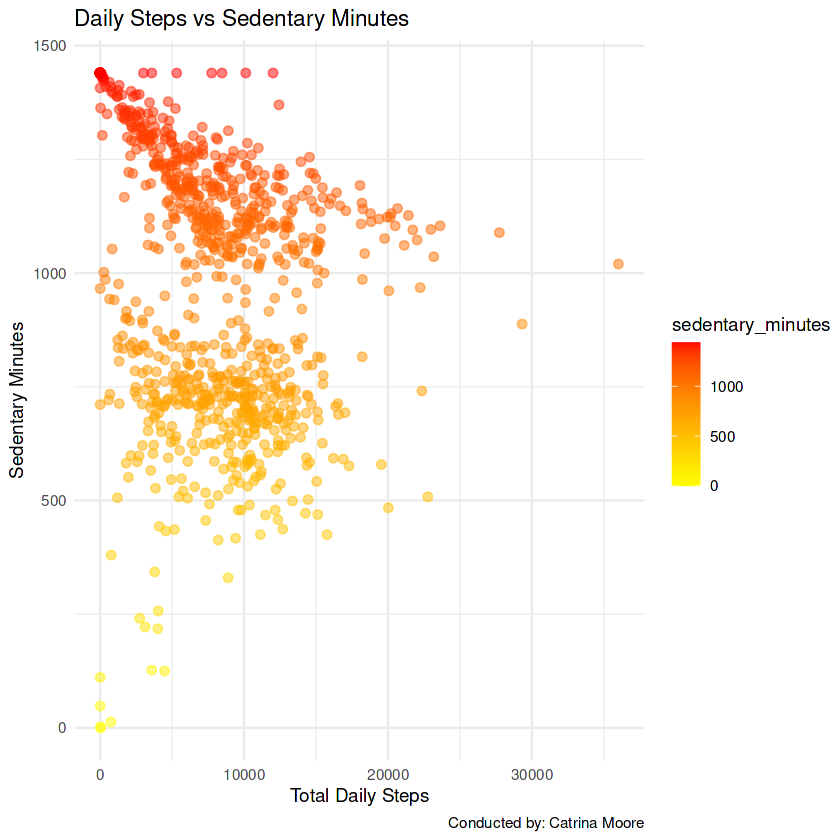

In [18]:
ggplot(activity_sleep, aes(x = total_steps, y = sedentary_minutes, color = sedentary_minutes)) +
  geom_point(size = 2, alpha = 0.5) +
scale_color_gradient(low="yellow", high="red") +
  labs(
    title = "Daily Steps vs Sedentary Minutes",
    caption = "Conducted by: Catrina Moore",
    x = "Total Daily Steps",
    y = "Sedentary Minutes"
  ) +
  theme_minimal()

## 4.5 Activity Level Distribution
Graph shows the distribution of the type of users by percentage. 

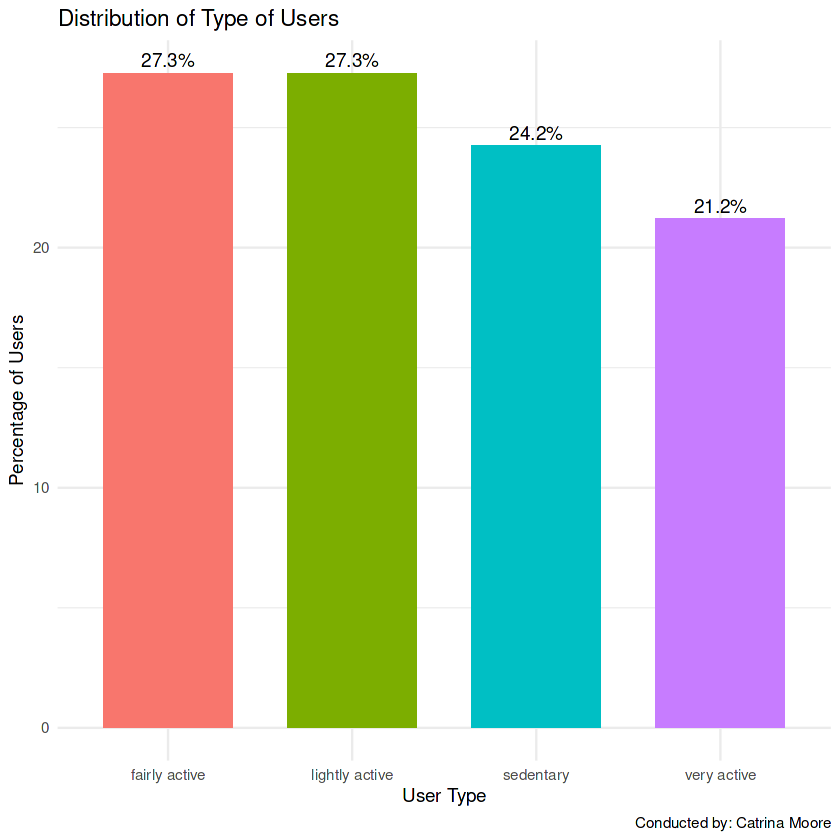

In [19]:
user_type_percent %>%
  ggplot(aes(x = type_of_use, y = percent, fill = type_of_use)) +
  geom_col(width = 0.7, show.legend = FALSE) +
  geom_text(aes(label = labels), vjust = -0.4) +
  labs(
    title = "Distribution of Type of Users",
    caption = "Conducted by: Catrina Moore",
    x = "User Type",
    y = "Percentage of Users"
  ) +
  theme_minimal()

## 4.6 Minutes Asleep vs. Time in Bed
Graph show the minutes asleep versus the time in bed. There is a positive correlation that shows as the total minutes asleep the time in bed increases.

Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


NULL

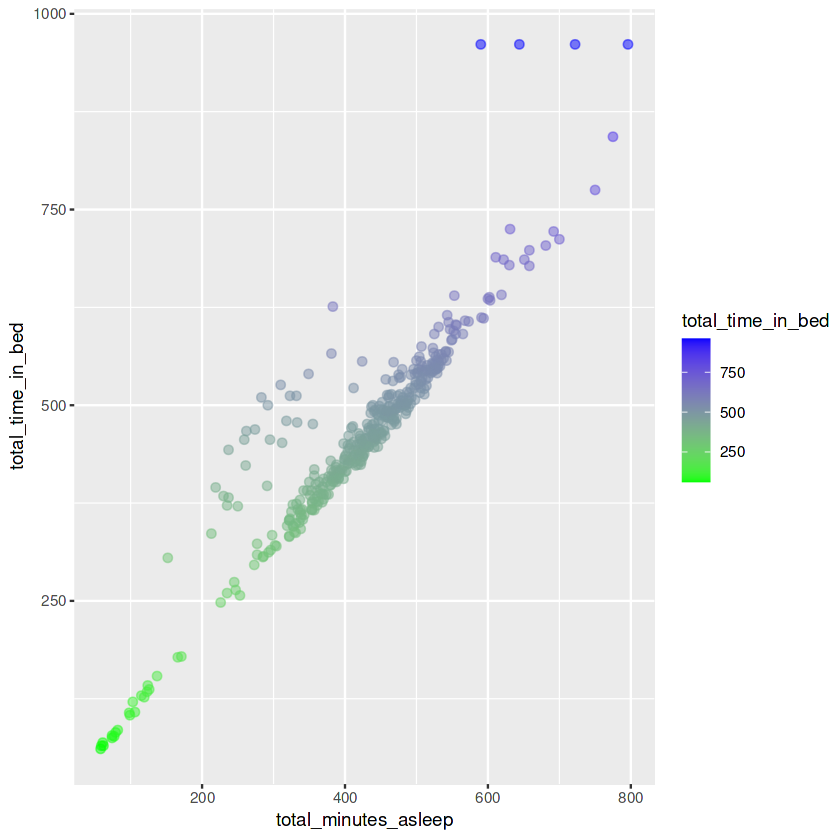

In [20]:
ggplot(activity_sleep, aes(x = total_minutes_asleep, y = total_time_in_bed, color=total_time_in_bed)) +
  geom_point(size = 2, alpha = 0.5) +
scale_color_gradient(low="green", high = "blue")
  labs(
    title = "Minutes Asleep vs Time in Bed",
    caption = "Conducted by: Catrina Moore",
    x = "Total Minutes Asleep",
    y = "Total Time in Bed"
  ) +
  theme_minimal()

## 4.7 Total Steps vs. Total Minutes Asleep
Graph shows as the total steps increase the minutes asleep.  We can make an assumption as that the more the user is active (steps) the longer the user sleep.  This doesn’t mean that there is a good quality of sleep.

Warning message:
“Removed 530 rows containing missing values or values outside the scale range
(`geom_point()`).”


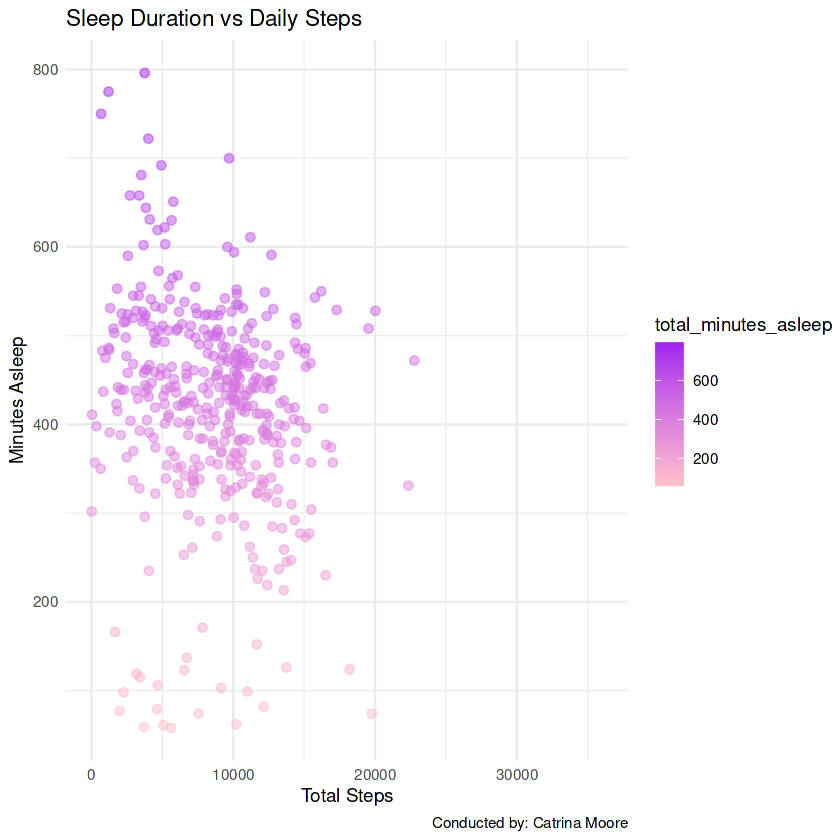

In [21]:
ggplot(activity_sleep, aes(x = total_steps, y = total_minutes_asleep, color = total_minutes_asleep)) +
  geom_point(size = 2, alpha = 0.5) +
scale_color_gradient(low = "pink", high = "purple") +
  labs(
    title = "Sleep Duration vs Daily Steps",
    caption = "Conducted by: Catrina Moore",
    x = "Total Steps",
    y = "Minutes Asleep"
  ) +
  theme_minimal()


# 5. Share

## 5.1 Key Findings
- There is a high sedentary time even among active users  
- Users with more steps tend to sleep longer  
- The majority of users fall into moderate activity levels  
- The tracking device is stronger for tracking steps and weaker for tracking sleep consistency  

# 6. Act

## 6.1 Recommendations for the Bellabeat Leaf Tracker

| Recommendation | Description |
|---|---|
| **1. Sedentary Behavior Campaign** | Develop a campaign highlighting Leaf as a daily movement companion with push notifications, customizable reminders, guided activities, and improved health. |
| **2. Sleep Health** | Develop a campaign focused on sleep consistency and features that identify patterns (stress, caffeine, habits) and offer an optimal wake-up experience. |
| **3. Personalization according to Lifestyle** | Personalize workouts and push notifications based on user activity levels: lightly active, fairly active, very active, sedentary. |

# 7. Conclusion

In this case study, I analyzed smart device data using R to identify trends in activity, sedentary behavior, and sleep. I cleaned, joined, and visualized multiple datasets to uncover actionable insights. Based on my findings, I developed data-driven marketing recommendations for Bellabeat’s Leaf wellness tracker focused on behavior nudges, sleep health, and personalized engagement.